# Visualisatoins for SVR 

In [1]:
# import relevant packages 
from src.data.create_simulated_data import SimulateData
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.model.svm_model import make_matrices
from src.data.preprocess_utils import filter 
from matplotlib import pyplot as plt 
from scipy.signal import welch 
from sklearn.svm import SVR 
from tqdm import tqdm
import seaborn as sns 
import numpy as np 
import pickle 
import os 


sns.set_theme()

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/methods/"
def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(figdir + name + ".pdf", bbox_inches='tight')

**$\varepsilon$-tube**

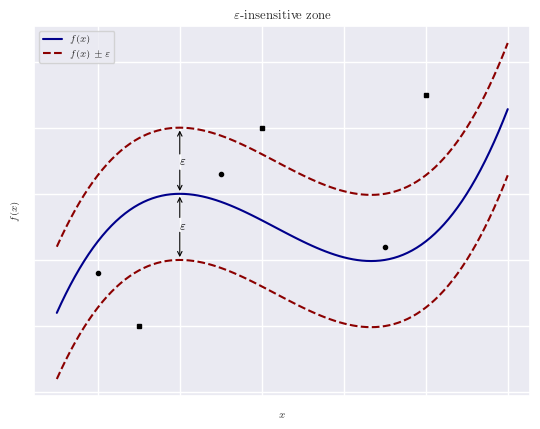

In [2]:
x = np.linspace(-3, 8, 100)
fx = x**3 - 7*x**2   # cubic function
fxp = fx + 50
fxm = fx - 50

# Create the figure
fig, ax = plt.subplots(1, 1)
ax.plot(x, fx, color="darkblue", label = r"$f(x)$")
ax.plot(x, fxp, '--', color="darkred", label = r"$f(x) \pm \varepsilon$")
ax.plot(x, fxm, '--', color="darkred")

# Add epsilon symbols
ax.text(0, 22, r"$\varepsilon$", fontsize=9, color="black")
ax.text(0, -27, r"$\varepsilon$", fontsize=9, color="black")

# Add arrows pointing to the red lines
ax.annotate(
    '', xy=(0, fxp[27]), xytext=(0, 28),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)
ax.annotate(
    '', xy=(0, 0), xytext=(0, 20),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)

ax.annotate(
    '', xy=(0, fxm[27]), xytext=(0, -27),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)
ax.annotate(
    '', xy=(0, 0), xytext=(0, -20),
    arrowprops=dict(arrowstyle='->', color='black', lw=0.8)
)

# add points in plot 
ax.plot([1, -2, 5], [15, -60, -40], 'o', color="black", markersize=3)
ax.plot([2, -1, 6], [50, -100, 75], 's', color = "black", markersize=3)

# Labels, title, and show
ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.set_title(r"$\varepsilon$-insensitive zone")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

savefig(fig, "epsilon_insensitive_zone", width = 4, height = 2.5)

### Different Kernel Functions

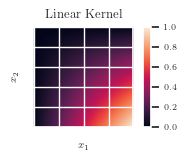

In [75]:
x = np.arange(100)[:, None]
res = np.dot(x, x.T)
res = res / res.max()

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
im = ax.imshow(res)
ax.set_title("Linear Kernel")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=0.1)

fig.colorbar(im, cax=cax, orientation='vertical')
savefig(fig, "svm_linear_kernel", width = 2., height = 1.3)


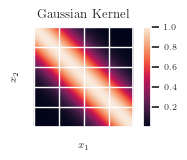

In [76]:
x = np.arange(100)[:, None]
res = np.exp(-0.001 * (x - x.T)**2)
res = res / res.max()

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
im = ax.imshow(res)
ax.set_title("Gaussian Kernel")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=0.1)

fig.colorbar(im, cax=cax, orientation='vertical')

savefig(fig, "svm_gaussian_kernel", width = 2., height = 1.3)


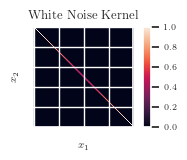

In [77]:
res = np.identity(100)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
im = ax.imshow(res)
ax.set_title("White Noise Kernel")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='8%', pad=0.1)

fig.colorbar(im, cax=cax, orientation='vertical')
savefig(fig, "svm_white_noise_kernel", width = 2, height = 1.3)


### Spectral Domain

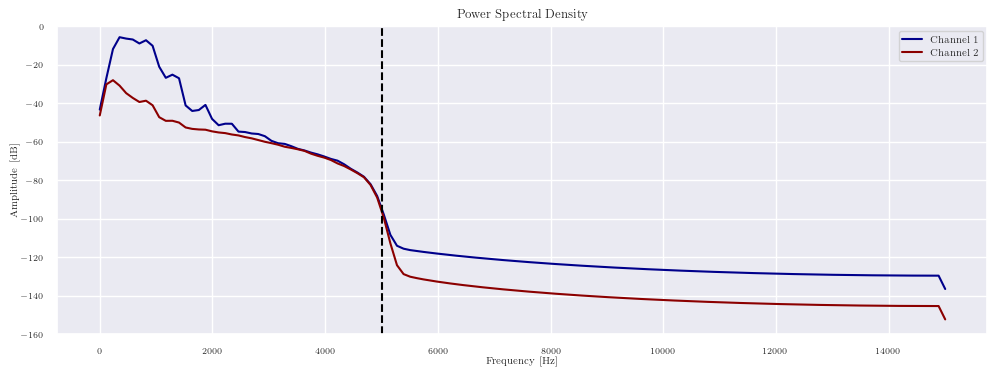

In [17]:
with open("../../src/visualizations/simulated_data.pkl", "rb") as f:
    config = pickle.load(f)
f.close()

X, _ = make_matrices(None, config['filtered_signal'])

f0, Pxx0 = welch(X[0], fs=30000, nperseg=256)
f1, Pxx1 = welch(X[1], fs=30000, nperseg=256)

fig = plt.figure(figsize=(12, 4))
plt.plot(f0, 10*np.log(Pxx0), color="darkblue", label = "Channel 1")
plt.plot(f1, 10*np.log(Pxx1), color="darkred", label = "Channel 2")
plt.legend()
plt.vlines(5000, -160, 0, color="black", linestyle="--")
plt.ylim(-160, 0)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.title("Power Spectral Density")
plt.show()

savefig(fig, "svm_psd", width = 6, height = 1.8)

In [ ]:
channel_varier_occurence_high = np.repeat(np.r_[0.1, np.ones(5) * 0.2, np.ones(5) * 0.7, np.ones(6) * 0.8, np.ones(15)*0.9], 3)
channel_varier_occurence_low = np.r_[np.ones(15)*0.1, np.ones(6)*0.2, np.ones(5)*0.3, np.ones(5)*0.2, 0.1]

# change directory to src/data
# os.chdir('../../src/data')
simulator_training = SimulateData(SNR=1, noise_params=[200, 1, 10, 20], num_channels = 32*3, channel_varier_occurrence=channel_varier_occurence_high)
simulator_testing = SimulateData(SNR=1, noise_params=[200, 1, 10, 20], channel_varier_occurrence=channel_varier_occurence_low)
simulator_training.construct_signal()
simulator_testing.construct_signal()

# filter signals
filtered_train, _ = filter(simulator_training.signal, max_count=10*3)
filtered_test, _ = filter(simulator_testing.signal)

# make matrices
X, y = make_matrices(simulator_training, filtered_train)
X_test, y_test = make_matrices(simulator_testing, filtered_test)

X_train_welch = np.zeros((X.shape[0], 43))
X_test_welch = np.zeros((X_test.shape[0], 43))

for i in tqdm(range(X.shape[0])):
    # training samples 
    f, Pxx = welch(X[i], fs=30000, nperseg=256)
    X_train_welch[i] = np.abs(Pxx[f < 5000])

for i in tqdm(range(X_test.shape[0])):
    # testing samples 
    f, Pxx = welch(X_test[i], fs=30000, nperseg=256)
    X_test_welch[i] = np.abs(Pxx[f < 5000])

# normalize the training data 
X_maxes = np.max(np.abs(X_train_welch), axis = 1)
X_ = np.abs(X_train_welch) / X_maxes.reshape(-1, 1)
y_max = np.max(y)
y_ = y / y_max if y_max != 0 else y

# normalize the testing data 
X_maxes = np.max(np.abs(X_test_welch), axis = 1)
X_test_= np.abs(X_test_welch) / X_maxes.reshape(-1, 1)
y_test_ = y_test / y_max if y_max != 0 else y_test

Original ACF : 0.9719377042390369
new acf :  0.043747729590074926
ratio : 0.0450108370107182
Original ACF : 0.9769462004093253
new acf :  0.02638950154262355
ratio : 0.027012236223004662


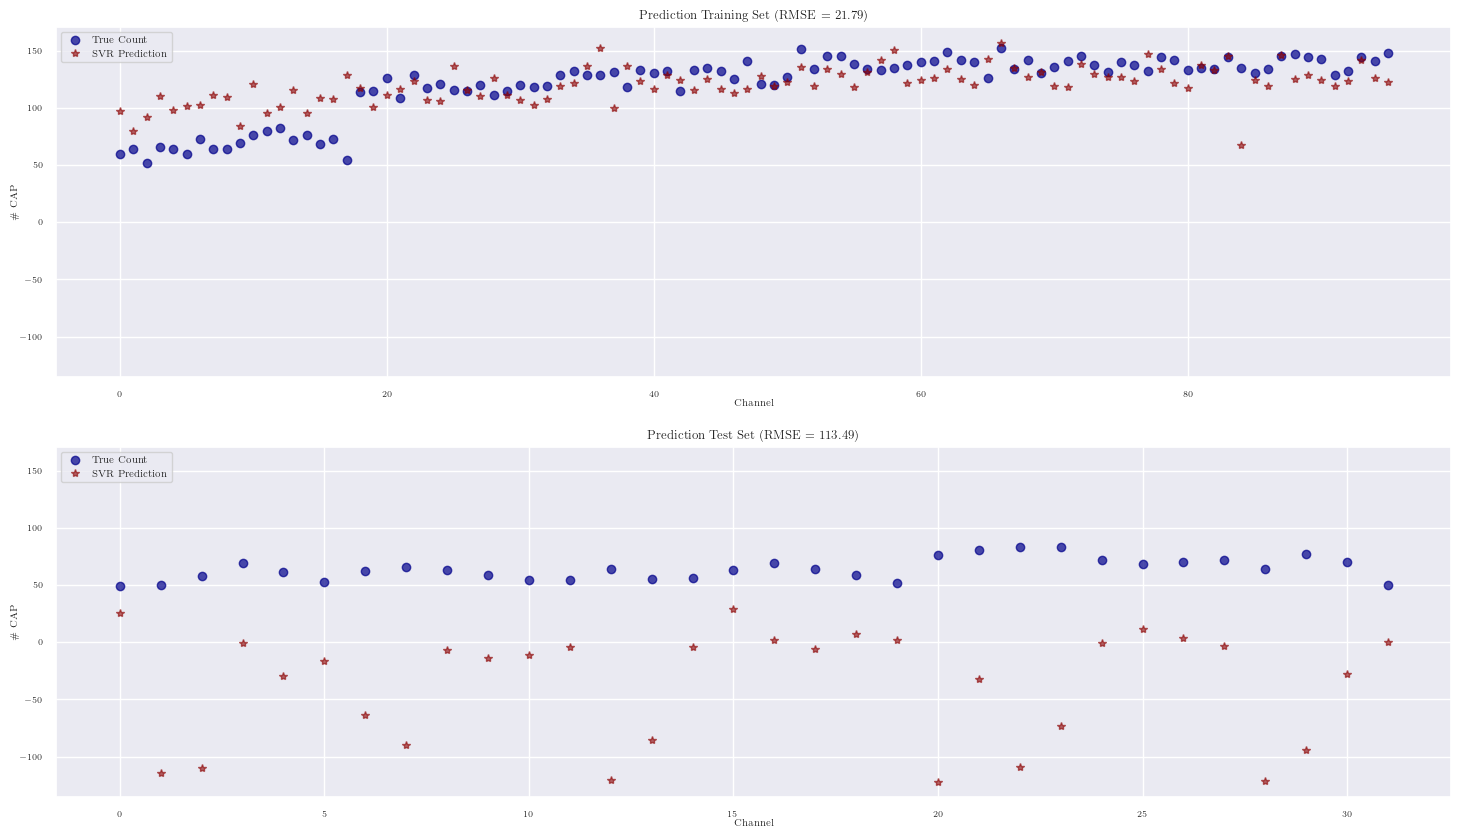

In [16]:
# initialize SVR model
svr = SVR(kernel = "linear", C = 800)

# fit model 
svr.fit(X_, y_)

# Predict
y_pred_train = svr.predict(X_) * y_max
y_pred = svr.predict(X_test_) * y_max

# compute RMSE
rmse_train = np.round(np.sqrt(np.mean((y - y_pred_train)**2)), 2)
rmse_test = np.round(np.sqrt(np.mean((y_test - y_pred)**2)), 2)

fig, ax = plt.subplots(2, 1, figsize = (18, 10), sharey=True)
ax[0].plot(np.arange(len(y)), y_ * y_max, 'o', color="darkblue", label="True Count", alpha=0.7)
ax[0].plot(np.arange(len(y)), y_pred_train, '*', color="darkred", label="SVR Prediction", alpha = 0.6)
ax[0].set_title("Prediction Training Set (RMSE = {})".format(rmse_train))

ax[1].plot(np.arange(len(y_test)), y_test_ * y_max, 'o', color="darkblue", label="True Count", alpha=0.7)
ax[1].plot(np.arange(len(y_test)), y_pred, '*', color="darkred", label="SVR Prediction", alpha = 0.6)
ax[1].set_title("Prediction Test Set (RMSE = {})".format(rmse_test))

# [a.set_ylim([3.5, 5.5]) for a in ax]
[a.set_xlabel("Channel") for a in ax]   
[a.set_ylabel(r"\# CAP") for a in ax]
[a.legend(loc = "upper left") for a in ax]
    
plt.show()

In [ ]:
from src.model.svm_model import count_caps_svm
import os 
from src.data.create_simulated_data import SimulateData
from src.data.preprocess_utils import filter
os.chdir('../../src/data')
simulator_train = SimulateData(SNR = 0, noise_params=[200, 1, 10, 20])
simulator_test = SimulateData(SNR = 0, noise_params=[200, 1, 10, 20])
simulator_train.construct_signal()
simulator_test.construct_signal()

filtered_signal_train, _ = filter(simulator_train.signal)
filtered_signal, _ = filter(simulator_test.signal)


Original ACF : 0.9792126663733097


In [1]:
estimated_caps_svm = count_caps_svm(simulator_train, filtered_signal_train, filtered_signal)
estimated_caps_svm

NameError: name 'count_caps_svm' is not defined

NameError: name 'filtered_signal_train' is not defined